In [2]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
import matplotlib.pyplot as plt
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

Text(0, 0.5, 'Амплитуда')

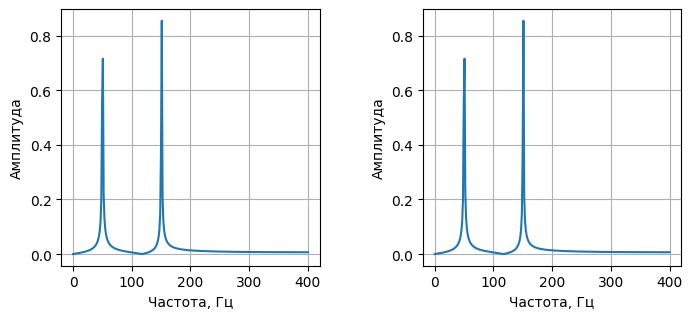

In [10]:
N = 600 # Количество отсчетов
fmax=800 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц
x = np.linspace(0.0, N*T, N)
y = np.cos(f * 2.0*np.pi*x) + np.cos(3*f * 2.0*np.pi*x) #
yf = DFT_slow(y)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

In [6]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

41.4 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
16.9 µs ± 99 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


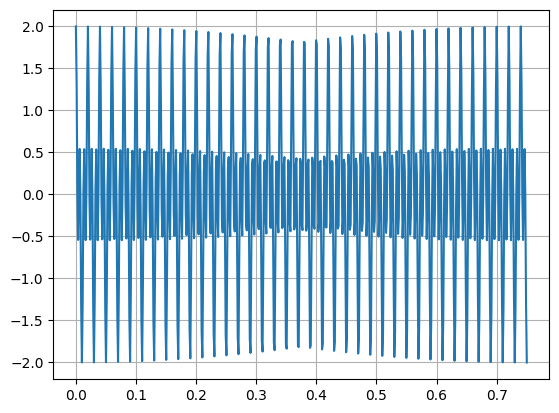

In [11]:
x = np.linspace(0.0, N*T, N)
yfff = ifft(yff)

plt.plot(x, yfff)
plt.grid()

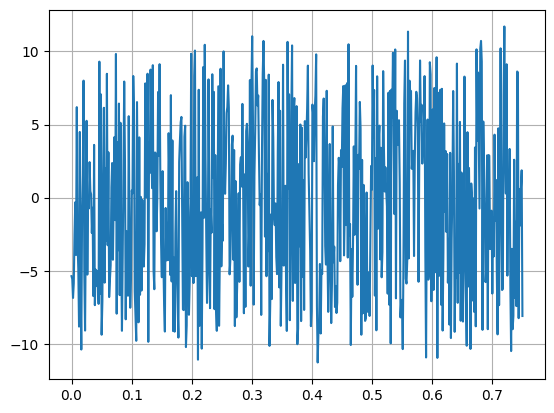

In [29]:
x = np.linspace(0.0, N*T, N)
yfff = ifft(yff)

plt.plot(x, yfff)
plt.grid()

-1.2459599905728747


Text(0, 0.5, 'Амплитуда')

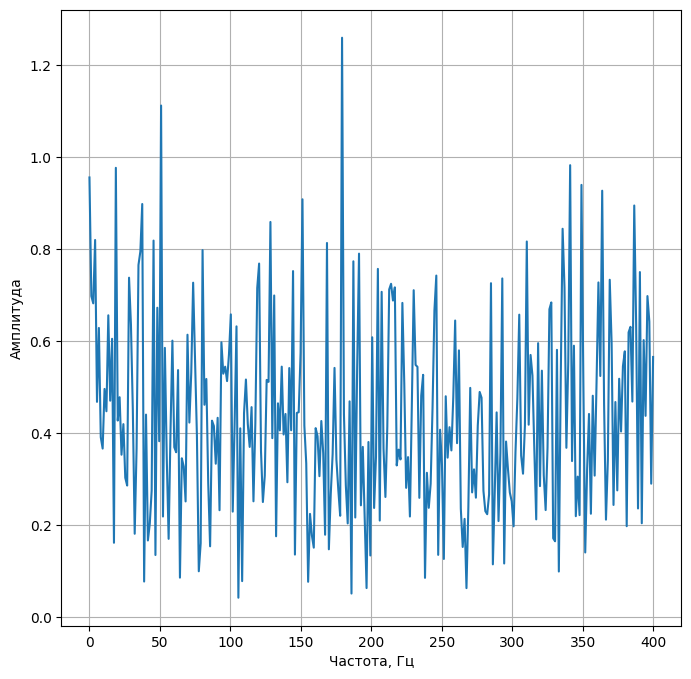

In [28]:

import random as rm
def noise(x):
    a = 10
    if rm.random() >= 0.5:
        return a*rm.random()
    else:
        return -a*rm.random() 
    #return 0.1 * np.cos(15* 2.0*np.pi*x) + 0.1 * np.sin(1 * 2.0*np.pi*x)  + rm.random() 
    #return 0

N = 600 # Количество отсчетов
fmax=800 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц
x = np.linspace(0.0, N*T, N)
print(noise(x))
fn = np.vectorize(noise)
y = np.cos(f * 2.0*np.pi*x) + np.cos(3*f * 2.0*np.pi*x) + fn(x) #
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

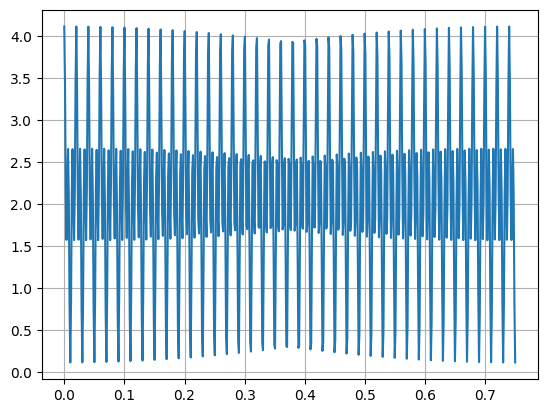

In [10]:
x = np.linspace(0.0, N*T, N)
yfff = ifft(yff)

plt.plot(x, yfff)
plt.grid()

In [28]:
def sqr_signal (x):
    a = 2.0
    T = 2
    if x < 0:
        x = abs(x) + float(T)/2
    place = x - float(T * (int(x)//T))
    if (place >= 1.0):
        return (-a)
    else:
        return (a)


Text(0, 0.5, 'Амплитуда')

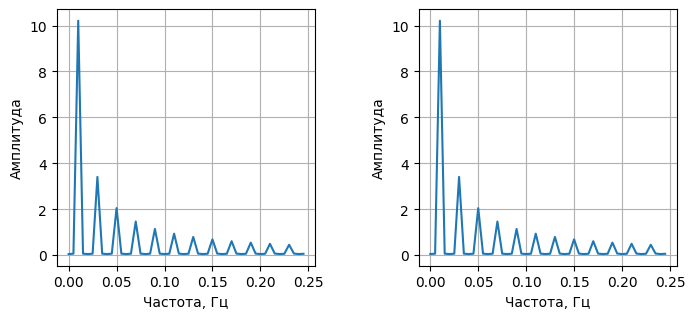

In [32]:
N = 100 # Количество отсчетов
fmax=300 # максимальная частота


T = 2.0
x = np.arange(0, 4.01, 0.01)
f = np.vectorize(sqr_signal)
y = f(x)


yf = DFT_slow(y)
xf = np.linspace(0.0, fmax/2, N//2)
xf = fftfreq(N, T)[:N//2]
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

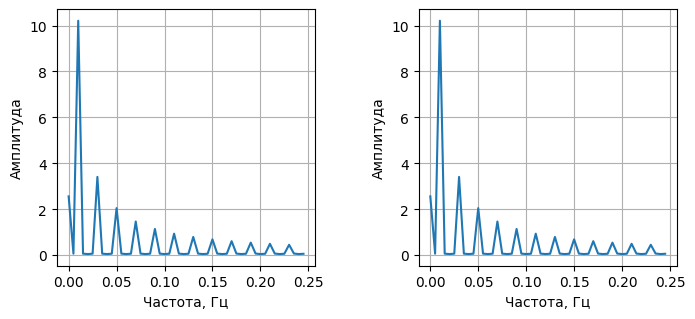

In [40]:
N = 100 # Количество отсчетов
fmax=300 # максимальная частота


T = 2.0
x = np.arange(0, 4.01, 0.01)
f = np.vectorize(sqr_signal)
y = f(x) + noise(x)


yf = DFT_slow(y)
xf = np.linspace(0.0, fmax/2, N//2)
xf = fftfreq(N, T)[:N//2]
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

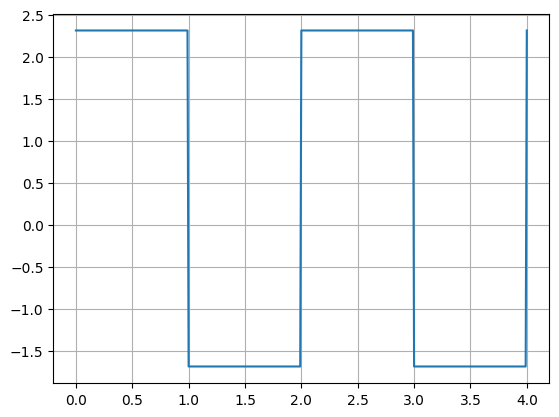

In [41]:
x = np.arange(0, 4.01, 0.01)
yfff = ifft(yff)

plt.plot(x, yfff)
plt.grid()

In [48]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N/2)] * X_odd,
                               X_even + factor[int(N/2):] * X_odd])

Text(0, 0.5, 'Амплитуда')

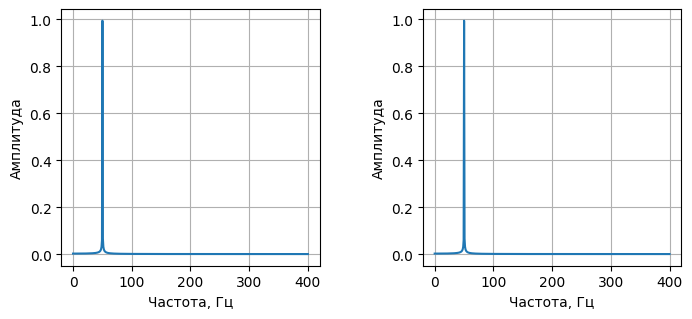

In [49]:
N = 1024 # Количество отсчетов
fmax=800 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц
x = np.linspace(0.0, N*T, N)
y = np.cos(f * 2.0*np.pi*x) 
yf = FFT(y)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

In [50]:
%timeit FFT(x)
%timeit np.fft.fft(x)

2.07 ms ± 6.03 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.6 µs ± 10.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
